# 선형 회귀 (Lineal Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
display(boston_df.info())
display(boston_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


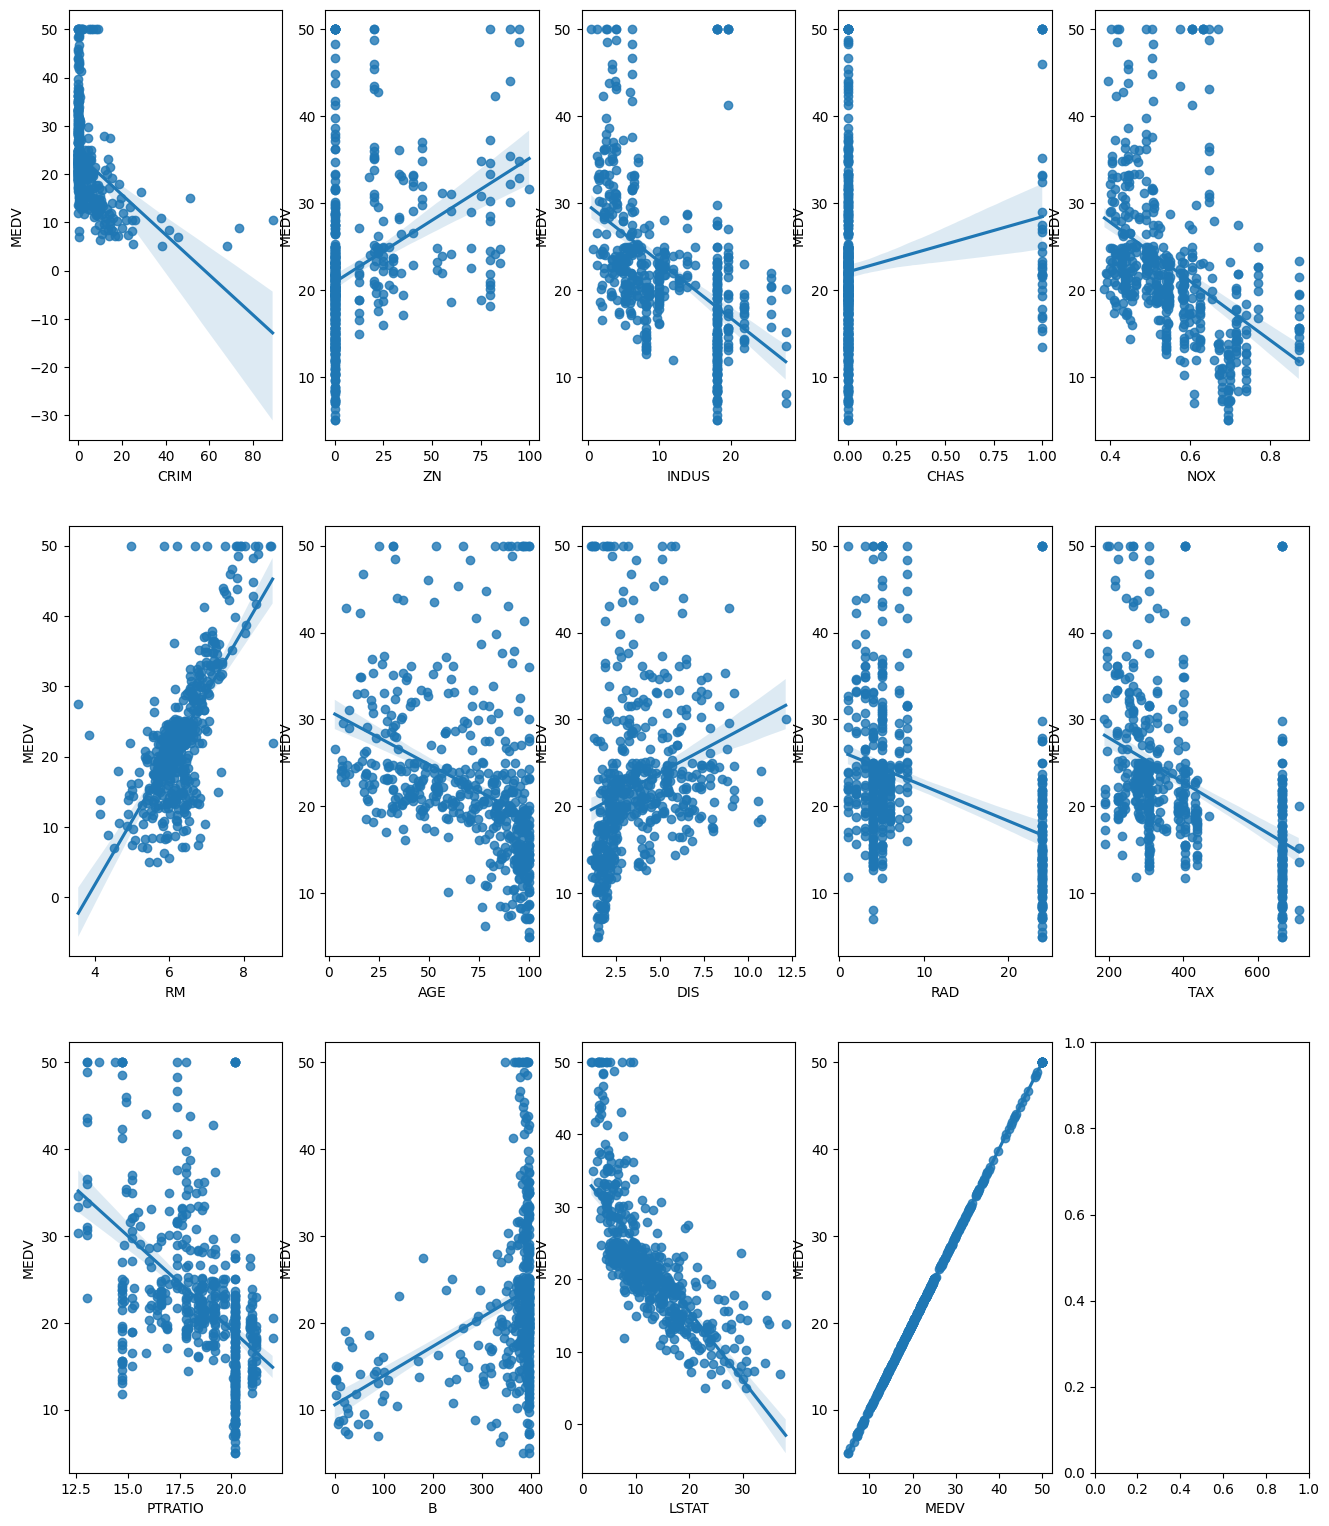

In [4]:
fig, ax = plt.subplots(figsize=(16, 19), ncols=5, nrows=3)

columns = ['CRIM',	'ZN', "INDUS", 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)

In [5]:
from sklearn.model_selection import train_test_split

# 입력-라벨 데이터 분리
x = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# 학습-테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [6]:
# 학습 및 평가
from sklearn.linear_model import LinearRegression

# 학습
lr = LinearRegression()
lr.fit(x_train, y_train)

# 평가 -> score 기본 평가 지표 : R^2 (결정계수)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.748087259862344, 0.6844267283527068)

In [7]:
y_pred = lr.predict(x_test)

In [8]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2= r2_score(y_true, y_pred)
    print(f'MES: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')
    
evaluate_regression(y_test, y_pred)

MES: 22.098694827098427, RMSE: 4.700924890603808, MAE: 3.060939595437103, R2: 0.6844267283527068


In [9]:
coef = lr.coef_     # 회귀계수 (특성에 대한 가중치)
intercept = lr.intercept_   # 절편

print(boston_df.columns)
coef, intercept

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 np.float64(29.83642016383829))

# 다항회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 방법

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

print(x_train.shape, x_train_poly.shape, x_test.shape, x_test_poly.shape)
poly.get_feature_names_out()

(379, 13) (379, 104) (127, 13) (127, 104)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [11]:
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)

print(lr_poly.score(x_train_poly, y_train), lr_poly.score(x_test_poly, y_test))

y_pred = lr_poly.predict(x_test_poly)
evaluate_regression(y_test, y_pred)

0.9448313975211593 0.7758378393380547
MES: 15.697435826529468, RMSE: 3.9619989685169617, MAE: 2.5831967745453217, R2: 0.7758378393380547


### 캘리포니아 집값 예측해보기

In [12]:
# 캘리포니아 집값 데이터 로드
from sklearn.datasets import fetch_california_housing   # 캘리포니아 데이터 저장

california_data = fetch_california_housing()    # 캘리포니아 데이터 받아오기
california_data.keys()                          # 키값 확인
print(california_data.feature_names)            # columns 확인
print(california_data.target_names)             # rows 확인

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [13]:
# DataFrame 생성 -> 구조, 기초 통계

california_pd = pd.DataFrame(             # DataFrame화로 변경
    california_data.data,                 # data 
    columns=california_data.feature_names # columns
)
california_pd['MedHouseVal'] = california_data.target # row



In [14]:
# DataFrame 생성 -> 구조, 기초 통계 T
califonia_df = pd.DataFrame(data = california_data.data, columns=california_data.feature_names)
califonia_df[california_data.target_names[0]]

KeyError: 'MedHouseVal'

In [ ]:
# 시각화 -> 특성 확인

fig, ax = plt.subplots(figsize=(16, 19), ncols=5, nrows=2)  # 

for i, col_name in enumerate(california_data.feature_names):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]
    sns.scatterplot(data=california_pd, x=col_name, y='MedHouseVal', ax=ax_temp)

In [ ]:
# 시각화 -> 특성 확인 T

fig, ax = plt.subplots(figsize=(16, 19), ncols=4, nrows=2)  # 

for i, col_name in enumerate(california_data.feature_names):
    row = i // 4
    col = i % 4
    ax_temp = ax[row][col]
    sns.scatterplot(data=california_pd, x=col_name, y='MedHouseVal', ax=ax_temp)

In [63]:
# 다중회귀 (훈련, 평가, 다른 평가 지표들로 평가)
from sklearn.model_selection import train_test_split

# 입력-라벨 데이터 분리
x = california_pd.drop('MedHouseVal', axis=1)
y = california_pd['MedHouseVal']

# 학습-테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# 학습 및 평가
from sklearn.linear_model import LinearRegression

# 학습
lr = LinearRegression()
lr.fit(x_train, y_train)

# 평가 -> score 기본 평가 지표 : R^2 (결정계수)
print(lr.score(x_train, y_train), lr.score(x_test, y_test))

y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2= r2_score(y_true, y_pred)
    print(f'MES: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')
    
evaluate_regression(y_test, y_pred)


0.609873031052925 0.5910509795491351
MES: 0.5411287478470689, RMSE: 0.7356145375446769, MAE: 0.5296964012919448, R2: 0.5910509795491351


In [81]:
# 다중회귀 (훈련, 평가, 다른 평가 지표들로 평가)
x = california_data.data
y = california_data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train), lr.score(x_test, y_test))
evaluate_regression(y_test, lr.predict[x_test])

0.609873031052925 0.5910509795491352


TypeError: 'method' object is not subscriptable

In [67]:
# 다항회귀 (훈련, 평가, 다른 평가 지펴들로 평가)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

print(x_train.shape, x_train_poly.shape, x_test.shape, x_test_poly.shape)
poly.get_feature_names_out()

lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)

print(lr_poly.score(x_train_poly, y_train), lr_poly.score(x_test_poly, y_test))

y_pred = lr_poly.predict(x_test_poly)
evaluate_regression(y_test, y_pred)



(15480, 8) (15480, 44) (5160, 8) (5160, 44)
0.6829089327528401 0.6563005877444335
MES: 0.4547892849445627, RMSE: 0.6743806676829954, MAE: 0.46460207770621537, R2: 0.6563005877444335


In [86]:
# 다항회귀 (훈련, 평가, 다른 평가 지펴들로 평가)
from sklearn.pipeline import Pipeline

model = Pipeline([
    # (이름, 객체)
    ('poly', PolynomialFeatures(include_bias=False, degree=2)),
    ('lr', LinearRegression())    
])

model.fit(x_train, y_train)
print(model.score(x_train, y_train), model.score(x_test, y_test))
evaluate_regression(y_test, model.predict(x_test))

0.6829089327528401 0.6563005877444335
MES: 0.4547892849445627, RMSE: 0.6743806676829954, MAE: 0.46460207770621537, R2: 0.6563005877444335


In [88]:
lr = model.named_steps['lr']
coef = lr.coef_
intercept = lr.intercept_

poly = model.named_steps['poly']

x_sample = poly.transform(x_test)[0]
y_sample = np.dot(x_sample, coef) + intercept
print(y_sample, model.predict(x_test)[0])

0.552998785530292 0.5529987855302068
